### Imports/Setting Up Data

In [1]:
import Analysis_Functions_Environment 
from Basic_Distance_Functions import get_dists, dist_galaxies

In [12]:
from Analysis_Functions_Environment import cutting_dist, number_galaxies, number_galaxies_2_param, converting_to_arr, shorter_dist_lum_cut_range, jack_knifing

In [2]:
from astropy.coordinates import SkyCoord
import astropy.units as u

In [3]:
import initializing_saga
from initializing_saga import np, plt, pd
from initializing_saga import completed_hosts, completed_hosts_sorted, sats_completed_hosts_sorted
from LMC_MG import hosts_with_LMCs, magnitude_gap_hs, magnitude_gap_sat

SAGA `shared_dir` set to /Users/Veronica/Documents/GitHub/examples
SAGA `local_dir`  set to /Users/Veronica/Documents/GitHub/examples
SAGA `shared_dir` set to /Users/Veronica/Documents/GitHub/examples
SAGA `local_dir`  set to /Users/Veronica/Documents/GitHub/examples


In [4]:
environmental_master_list = pd.read_csv(r'/Users/Veronica/Downloads/Summer_2020_research/master_list_v2.csv')
#this will need to be changed to the path on your device for master_list_v2.csv!

In [5]:
from numpy import random

In [6]:
hosts_LMC_array_lum = []
hosts_no_LMC_array_lum = []
for key in hosts_with_LMCs.keys():
    x = list(hosts_with_LMCs.keys()).index(key)
    if hosts_with_LMCs[key] == True:
        hosts_LMC_array_lum.append([completed_hosts['K_ABS'][x]])
    else: 
        hosts_no_LMC_array_lum.append([completed_hosts['K_ABS'][x]])

In [7]:
hosts_LMC_array_sat_num = []
hosts_no_LMC_array_sat_num = []
for key in hosts_with_LMCs.keys():
    x = list(hosts_with_LMCs.keys()).index(key)
    if hosts_with_LMCs[key] == True:
        hosts_LMC_array_sat_num.append([completed_hosts['sats_Mr_limit'][x]])
    else: 
        hosts_no_LMC_array_sat_num.append([completed_hosts['sats_Mr_limit'][x]])

In [8]:
from Paper_2_Morphology import df_morph_prop_condensed

In [9]:
distance_galaxies = dist_galaxies(completed_hosts,'HOSTID', environmental_master_list)

In [10]:
pd.set_option('max_columns', None)
environmental_master_list.to_numpy()

array([['pgc43', 43, nan, ..., 0.0, 0, 2],
       ['pgc171', 171, nan, ..., 0.0, 0, 0],
       ['nsa126092', 218, nan, ..., 1.0, 0, 2],
       ...,
       ['pgc5061291', 5061291, nan, ..., 0.0, 0, 0],
       ['pgc5061296', 5061296, nan, ..., 0.0, 0, 0],
       ['pgc5094329', 5094329, nan, ..., 0.0, 0, 0]], dtype=object)

### Generating Analyzable Data with my Imports

In [14]:
distances = [5, 10, 20]
shorter_dists = {}
for i in range(len(distances)):
    shorter_dists[distances[i]] = cutting_dist(distances[i], distance_galaxies)

In [16]:
num_galaxies = {}
for key in shorter_dists.keys():
    num_galaxies[key] = number_galaxies(shorter_dists[key])

In [17]:
num_galaxies_LMC = {}
num_galaxies_no_LMC = {}
for key in shorter_dists.keys():
    num_galaxies_LMC[key], num_galaxies_no_LMC[key] = number_galaxies_2_param(shorter_dists[key], hosts_with_LMCs, True, False)

In [39]:
arr1 = []
num_galaxies_LMC_arrs = {}
for key in num_galaxies_LMC.keys():
    num_galaxies_LMC_arrs[key] = converting_to_arr(num_galaxies_LMC[key], arr1)
num_galaxies_no_LMC_arrs = {}
for key in num_galaxies_no_LMC.keys():
    num_galaxies_no_LMC_arrs[key] = converting_to_arr(num_galaxies_no_LMC[key], arr1)

In [ ]:
num_galaxies_SAB = {}
num_galaxies_ES0 = {}
for key in shorter_dists.keys():
    num_galaxies_SAB[key], num_galaxies_ES0[key] = number_galaxies_2_param(shorter_dists[key], df_morph_prop_condensed, 'SAB', 'E/S0')

In [19]:
lums_dists = {'-23.5, 5, 2': [-23.5, 5, 2], '-23.5, 10, 2': [-23.5, 10, 2], '-23.5, 20, 2': [-23.5, 20, 2], '-22, 5, 2': [-22, 5, 2], '-22, 10, 2': [-22, 10, 2], '-22, 20, 2': [-22, 20, 2]}

In [22]:
shorter_dists_lums = {}
for key in lums_dists.keys():
    shorter_dists_lums[key] = shorter_dist_lum_cut_range(distance_galaxies, lums_dists[key][0], lums_dists[key][1], lums_dists[key][2])

In [24]:
num_galaxies_lum_cuts = {}
for key in shorter_dists_lums.keys():
    num_galaxies_lum_cuts[key] = number_galaxies(shorter_dists_lums[key])

In [25]:
num_galaxies_LMC_cuts = {}
num_galaxies_no_LMC_cuts = {}
for key in shorter_dists_lums.keys():
    num_galaxies_LMC_cuts[key], num_galaxies_no_LMC_cuts[key] = number_galaxies_2_param(shorter_dists_lums[key], hosts_with_LMCs, True, False)

In [26]:
arr1 = []
num_galaxies_LMC_cuts_arrs = {}
for key in num_galaxies_LMC_cuts.keys():
    num_galaxies_LMC_cuts_arrs[key] = converting_to_arr(num_galaxies_LMC_cuts[key], arr1)
    
num_galaxies_no_LMC_cuts_arrs = {}
for key in num_galaxies_no_LMC_cuts.keys():
    num_galaxies_no_LMC_cuts_arrs[key] = converting_to_arr(num_galaxies_no_LMC_cuts[key], arr1)

In [ ]:
for key in shorter_dists_lums.keys():
    num_galaxies_SAB_cuts[key], num_galaxies_ESO_cuts[key] =  number_galaxies_2_param(shorter_dists_lums[key], df_morph_prop_condensed, 'SAB', 'E/S0')

### Scatter Plots and Correlation Calculations

Text(0.5, 0, 'Number of Galaxies within 20 Mpc')

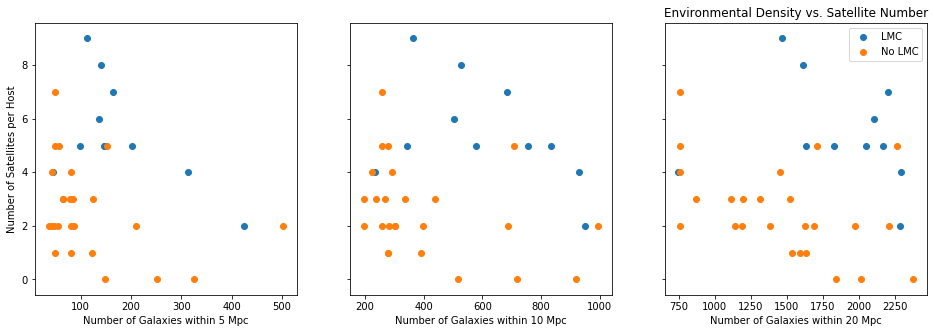

In [28]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex = False, sharey = True, figsize=(16, 5))
ax0.scatter(num_galaxies_LMC[5].values(),hosts_LMC_array_sat_num, label = 'LMC')
#print("Spearman correlation for LMCs " + str(scipy.stats.spearmanr(num_galaxies_5_LMC_arr, hosts_LMC_array_sat_num)))
#print("Spearman correlation for no LMCs " + str(scipy.stats.spearmanr(num_galaxies_5_no_LMC_arr, hosts_no_LMC_array_sat_num)))
ax0.scatter(num_galaxies_no_LMC[5].values(),hosts_no_LMC_array_sat_num, label = 'No LMC')
#plt.legend(loc = 'upper right')
ax0.set_xlabel('Number of Galaxies within 5 Mpc')
ax0.set_ylabel('Number of Satellites per Host')
plt.title("Environmental Density vs. Satellite Number")

ax1.scatter(num_galaxies_LMC[10].values(),hosts_LMC_array_sat_num, label = 'LMC')
#print("Spearman correlation for LMCs " + str(scipy.stats.spearmanr(num_galaxies_10_LMC_arr, hosts_LMC_array_sat_num)))
#print("Spearman correlation for no LMCs " + str(scipy.stats.spearmanr(num_galaxies_10_no_LMC_arr, hosts_no_LMC_array_sat_num)))
ax1.scatter(num_galaxies_no_LMC[10].values(),hosts_no_LMC_array_sat_num, label = 'No LMC')
#plt.legend(loc = 'upper right')
ax1.set_xlabel('Number of Galaxies within 10 Mpc')
#axes[1].ylabel('Number of Satellites per Host')
#plt.title("Environmental Desnity vs. Satellite Number")

ax2.scatter(num_galaxies_LMC[20].values(),hosts_LMC_array_sat_num, label = 'LMC')
#print("Spearman correlation for LMCs " + str(scipy.stats.spearmanr(num_galaxies_20_LMC_arr, hosts_LMC_array_sat_num)))
#print("Spearman correlation for no LMCs " + str(scipy.stats.spearmanr(num_galaxies_20_no_LMC_arr, hosts_no_LMC_array_sat_num)))

ax2.scatter(num_galaxies_no_LMC[20].values(),hosts_no_LMC_array_sat_num, label = 'No LMC')
plt.legend(loc = 'upper right')
ax2.set_xlabel('Number of Galaxies within 20 Mpc')
#axes[2].ylabel('Number of Satellites per Host')
#plt.title("Environmental Density vs. Satellite Number")

Text(0.5, 0, 'Number of Galaxies Brighter than -22 within 20 Mpc')

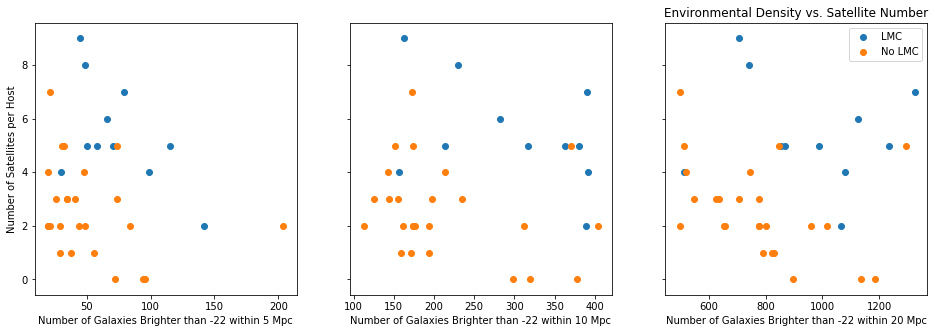

In [31]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex = False, sharey = True, figsize=(16, 5))
ax0.scatter(num_galaxies_LMC_cuts['-22, 5, 2'].values(),hosts_LMC_array_sat_num, label = 'LMC')
ax0.scatter(num_galaxies_no_LMC_cuts['-22, 5, 2'].values(),hosts_no_LMC_array_sat_num, label = 'No LMC')
ax0.set_xlabel('Number of Galaxies Brighter than -22 within 5 Mpc')
ax0.set_ylabel('Number of Satellites per Host')
plt.title("Environmental Density vs. Satellite Number")

ax1.scatter(num_galaxies_LMC_cuts['-22, 10, 2'].values(),hosts_LMC_array_sat_num, label = 'LMC')
ax1.scatter(num_galaxies_no_LMC_cuts['-22, 10, 2'].values(),hosts_no_LMC_array_sat_num, label = 'No LMC')
ax1.set_xlabel('Number of Galaxies Brighter than -22 within 10 Mpc')

ax2.scatter(num_galaxies_LMC_cuts['-22, 20, 2'].values(),hosts_LMC_array_sat_num, label = 'LMC')
ax2.scatter(num_galaxies_no_LMC_cuts['-22, 20, 2'].values(),hosts_no_LMC_array_sat_num, label = 'No LMC')
plt.legend(loc = 'upper right')
ax2.set_xlabel('Number of Galaxies Brighter than -22 within 20 Mpc')

### Bar and Whisker

Text(0.5, 1.0, 'Environmental Density at -23.5')

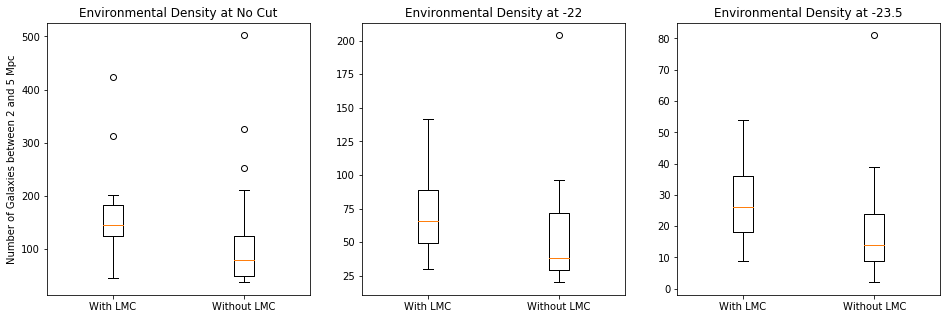

In [44]:
#a plot comparing host luminosity to whether there is an LMC!!
num_gal_5 = [num_galaxies_LMC_arrs[5], num_galaxies_no_LMC_arrs[5]]
num_gal_5_22 = [num_galaxies_LMC_cuts_arrs['-22, 5, 2'], num_galaxies_no_LMC_cuts_arrs['-22, 5, 2']]
num_gal_5_235 = [num_galaxies_LMC_cuts_arrs['-23.5, 5, 2'], num_galaxies_no_LMC_cuts_arrs['-23.5, 5, 2']]
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex = False, sharey = False, figsize=(16, 5))

ax0.boxplot(num_gal_5)
ax0.set_xticklabels(['With LMC', 'Without LMC'])
ax0.set_ylabel('Number of Galaxies between 2 and 5 Mpc')
ax0.set_title('Environmental Density at No Cut')

ax1.boxplot(num_gal_5_22)
ax1.set_xticklabels(['With LMC', 'Without LMC'])
ax1.set_title('Environmental Density at -22')

ax2.boxplot(num_gal_5_235)
ax2.set_xticklabels(['With LMC', 'Without LMC'])
ax2.set_title('Environmental Density at -23.5')